<a href="https://colab.research.google.com/github/yeahginny/Machine_learning/blob/main/ML_decision_tree_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 패키지 설치
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/uciml/glass
df = pd.read_csv("/content/glass.csv")

# 데이터 샘플 확인
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# 컬럼 정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# 종속변수 문자형 변환

df["Type_str"]=df["Type"].apply(str)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_str
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [6]:
# 의사결정나무 모델 용 데이터셋 가공

# 독립변수, 종속변수 분리
df_x = df[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']]
df_y = df[['Type_str']]

# 학습셋과 테스트셋 분리하여 생성(6:4)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.4,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  128
test data 개수:  86


In [7]:
# 의사결정나무 모델 적용

# 모델 생성 및 학습
dt_model = DecisionTreeClassifier(criterion = "entropy", max_depth=5)
dt_model.fit(x_train,y_train)

# 테스트셋 예측
y_pred = dt_model.predict(x_test)

# 정확도 계산
accuracy_score(y_test, y_pred)

0.6395348837209303

In [ ]:
# 독립변수 중요도 확인

dt_model.feature_importances_

pd.DataFrame({'feature' : x_train.columns,

              'importance' : dt_model.feature_importances_})

,feature,importance
0,RI,0.111472
1,Na,0.052743
2,Mg,0.320142
3,Al,0.176380
4,Si,0.133069
5,K,0.038926
6,Ca,0.153107
7,Ba,0.000000
8,Fe,0.014162


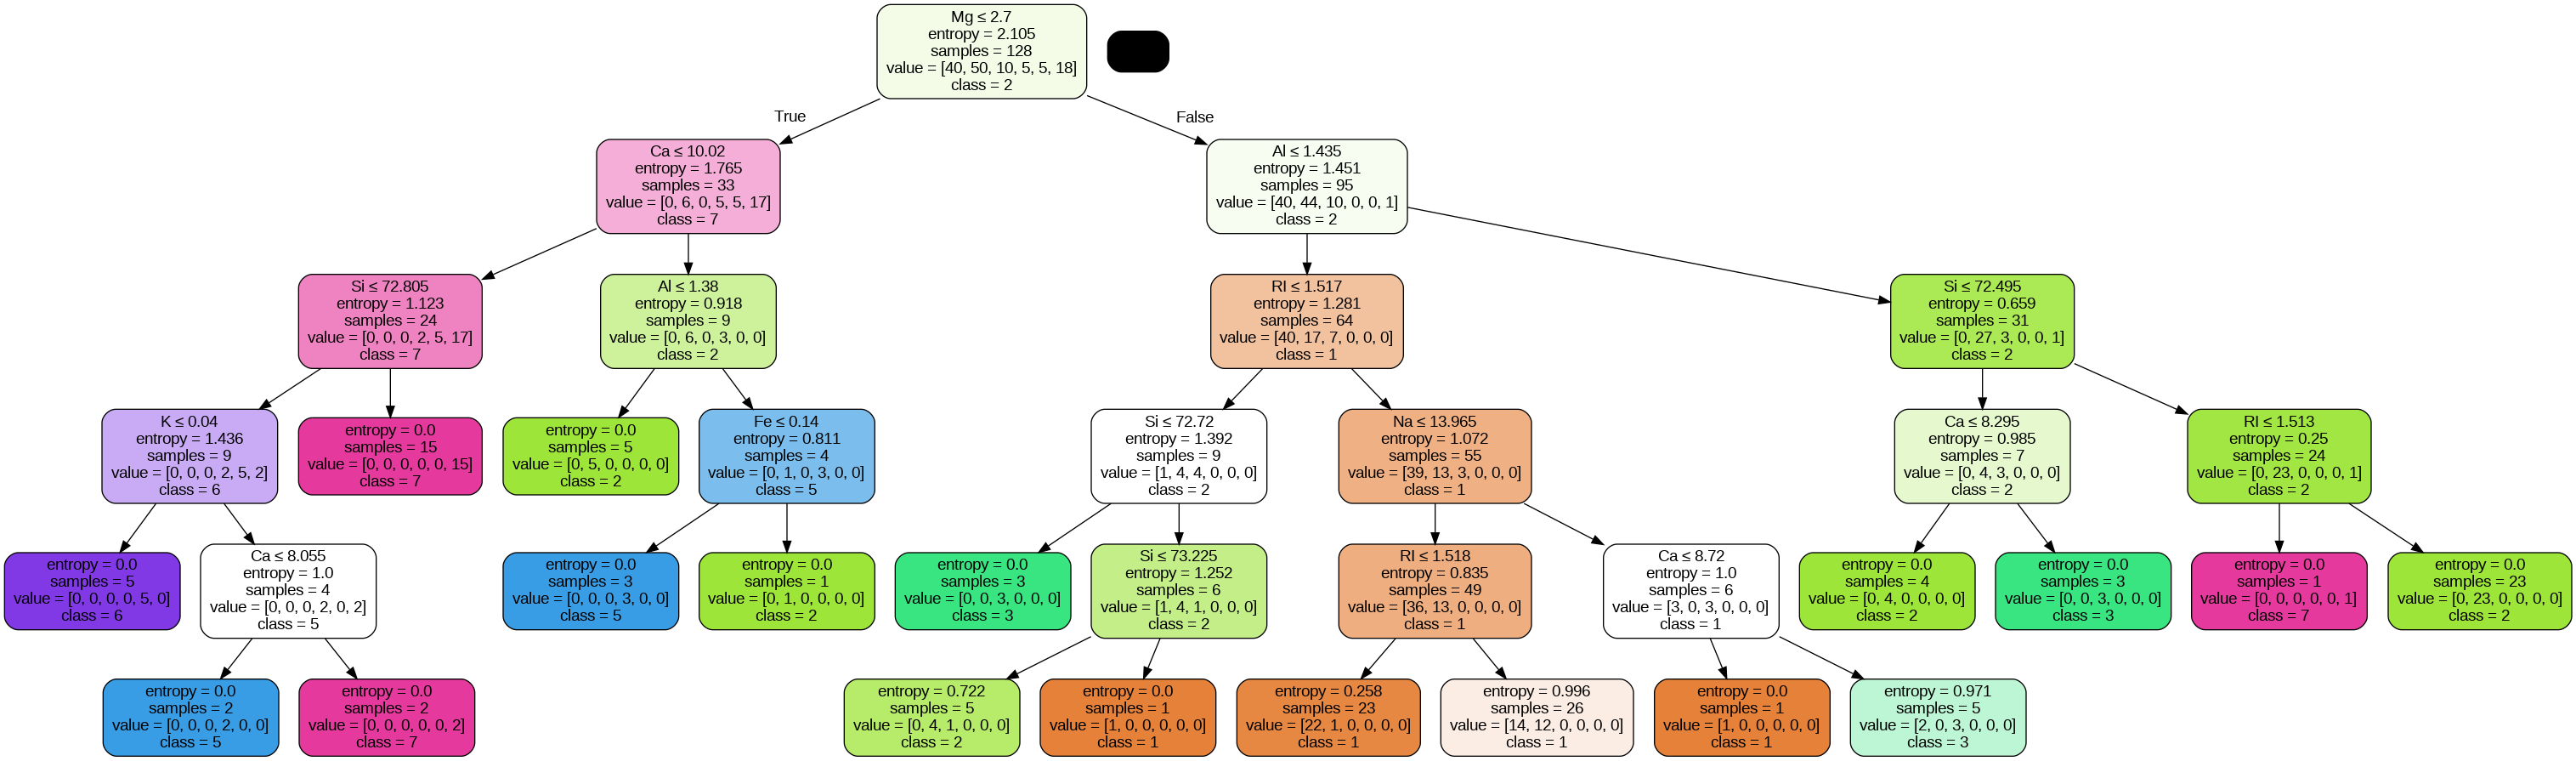

In [ ]:
# 의사결정나무 시각화

# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

# 시각화 세부 옵션 설정
dot_data = export_graphviz(dt_model, out_file=None,
                           feature_names=x_train.columns,
                           class_names=dt_model.classes_,
                           filled=True, rounded=True,
                           special_characters=True)

# 시각화
dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

In [ ]:
# 랜덤포레스트 모델 생성

# 기본 모델
# rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)

rnf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0,
                                   bootstrap=True, class_weight=None, criterion='gini',
                                   max_features='auto', max_leaf_nodes=None,
                                   min_impurity_decrease=0.0, min_samples_leaf=1,
                                   min_samples_split=2, min_weight_fraction_leaf=0.0,
                                   n_jobs=None, oob_score=False,  verbose=0,
                                   warm_start=False)

rnf_model.fit(x_train,y_train)

y_pred = rnf_model.predict(x_test)
print(accuracy_score(y_test,y_pred))

<ipython-input-12-7dc34b3ccb7f>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnf_model.fit(x_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


0.7093023255813954


In [ ]:
# 실제값 1/예측값 1 - TP - 1을 1으로 예측한 확률(중요)
# 실제값 0/예측값 1 - FP - 0을 1로 예측한 확률
# 실제값 0/예측값 0 - TN - 0을 0으로 예측한 확률(중요)
# 실제값 1/예측값 0 - FN - 1을 0으로 예측한 확률

# Accuracy = (TP + TN) / 전체
# Error Rate = (FP + FN) / 전체
# Precision = TP / (TP + FP)
# recall = TP / (TP + FN)

# 랜덤포레스트 모델 성능 리포트 출력
# precision - 정밀도 1으로 예측하여 분류한 관측치중 실제 1인 비중
# 모델이 실제 1을 얼마나 잘 예측하는지에 대한 척도

# recall - 재현율 실제 1인 광측치 중에서 모델이 정확히 1로 예측하여 분류한 비중
# 모델의 정밀도가 우수해도 실제 1인 관측치를 너무 적게 찾아내면 좋은 모델이라 할 수 없음
# 이 수치도 동일하게 높아야함

# f1-score 는 정밀도와 민감도를 같이 보는 척도 0과 1사이의 값을 가짐
# (1 + beta^2) + (precision * recall) / (beta^2 * precision) + recall

# 만약 정밀도와 민감도의 중요도를 동일하게 보면 beta에 1을 대입해주면 되고,
# 정밀도가 중요하면 beta는 1미만 민감도를 중요시 여기면 beta는 1초과로 설정하면 됩니다.

# 왼쪽에 있는 index는 각 클래스별 예측도를 보여주고,
# accuracy는 전체 정확도
# micro avg: 모든 클래스의 FP, FN, TP의 총합을 이용해 계산한 평균값
# macro avg: 모든 클래스의 점수에 대한 단순 평균
# weighted avg: 각 클래스 점수의 support에 따른 가중 평균 입니다.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.69      0.73      0.71        30
           2       0.62      0.77      0.69        26
           3       0.67      0.29      0.40         7
           5       1.00      0.75      0.86         8
           6       0.50      0.25      0.33         4
           7       0.91      0.91      0.91        11

    accuracy                           0.71        86
   macro avg       0.73      0.62      0.65        86
weighted avg       0.72      0.71      0.70        86



In [ ]:
## 랜덤포레스트 변수 중요도 출력

feature_imp = pd.Series(rnf_model.feature_importances_,
                        index=x_train.columns).sort_values(ascending=False)
feature_imp[:20]

Al    0.159236
Ca    0.153955
Mg    0.148816
RI    0.140340
Na    0.107937
Ba    0.090783
K     0.079957
Si    0.072258
Fe    0.046717
dtype: float64

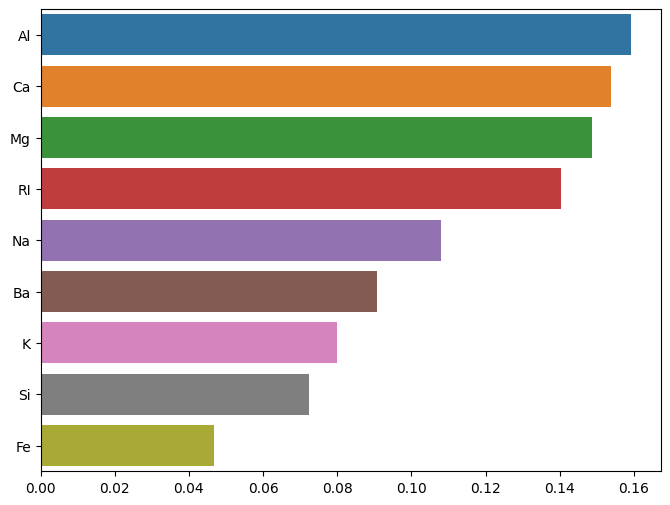

In [ ]:
# 랜덤포레스트 변수 중요도 시각화

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.show()